# Mount my Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Read a file from the Week01 PGSS2023 class folder

In [14]:
# /content/gdrive/MyDrive/PGSS2022/PGSS2023/Week01/iris.csv

import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/PGSS 2023/Week 1/iris.csv", header=None)
df.columns = ["Petal.Length", "Petal.Width", "Sepal.Length", "Sepal.Width", "Species"]
df

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: xlabel='Sepal.Length', ylabel='Species'>

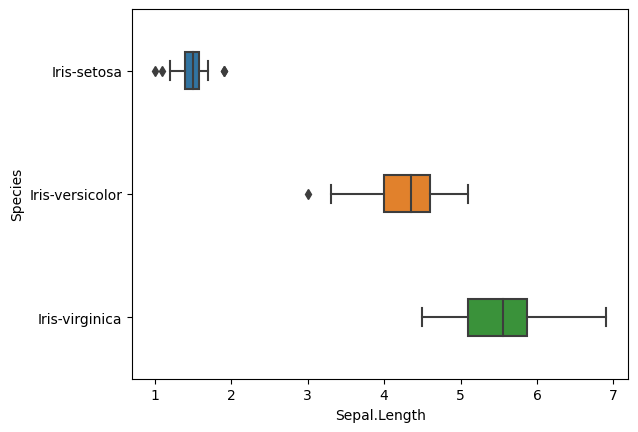

In [16]:
# Create a boxplot to describe the average sepal length of each species of iris
from matplotlib import pyplot as plt
import seaborn as sns
# sns.barplot(x="Species", y="Sepal.Length", data=iris_df)

sns.boxplot(y="Species", x="Sepal.Length", data=df, width=0.3)



Text(0.5, 1.0, 'Overlapping Probability Density Plot of "Sepal.Width"')

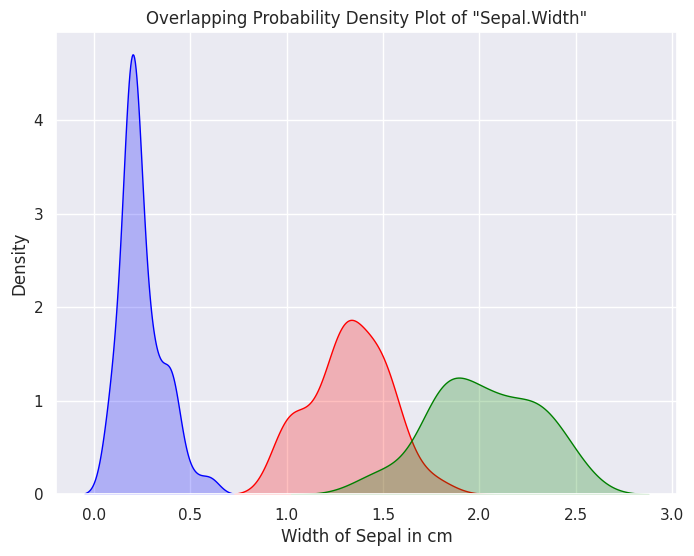

In [23]:
# Plot an overlapping kernel probability density plot by Species of the "Sepal.Length"
import seaborn as sns
# Set figure sizes
sns.set(rc={"lines.linewidth":0.5, "figure.figsize":(8, 6)})
# Set figure title

# Create overlapping probability density plot by Species using the seaborn visualization library
ax = sns.kdeplot(df[df.Species == 'Iris-setosa']["Sepal.Width"], color = "blue", fill = True)
ax = sns.kdeplot(df[df.Species == 'Iris-versicolor']["Sepal.Width"], color = "red", fill = True)
ax = sns.kdeplot(df[df.Species == 'Iris-virginica']["Sepal.Width"], color = "green", fill = True,
                    label = "hue = Species")
ax.set_xlabel("Width of Sepal in cm")
ax.set_ylabel("Density")
ax.set_title("Overlapping Probability Density Plot of \"Sepal.Width\"")

# Run some R code inside Colab

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(readr)
iris <- read_csv("/content/gdrive/MyDrive/PGSS2022/PGSS2023/Week01/iris.csv") #,
                 #col_names = FALSE, col_types = cols(X1 = col_double()))
# colnames(iris) <- c("Petal.Length", "Petal.Width", "Sepal.Length", "Sepal.Width", "Species")
# View(iris)

# iris$Species <- as.factor(iris$Species)
# sapply(iris, class)

# table(iris$Species)

NotImplementedError: ignored

# Lets try to read in some data from Google Sheets

In [ ]:
# https://docs.google.com/spreadsheets/d/1VK-Zs72ebK6ddwvDYFN2cA04PDTbVLXJeylmdJ7OxkM/edit#gid=0

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('PGSS2023').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

In [ ]:
rows[0]

In [ ]:
# Convert to a DataFrame and render.
import pandas as pd

df2 = pd.DataFrame.from_records(rows[1:])
df2.columns = rows[0]
df2

In [ ]:
df2.iloc[2:5, 3:10]

In [ ]:
df2.iloc[2:5, :-5]